<a href="https://colab.research.google.com/github/portoforigin/deeplearn/blob/main/FastAI_PETS_Breed_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Install Dependencies:**

 - Default version of fastai in Google Colab is 1.0.61(?), we need >v2.2.5

In [2]:
!pip install -Uqq fastai
!pip install lime

import fastai
fastai.__version__

PROJECT_NAME = "FastAI_PETS"
MODEL_NAME = "fastai_pets_breed_001.pkl"

## **PETS Dataset**

Load a view the PETS dataset:

In [4]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)
# path.ls()

files = get_image_files(path/"images")
print("There are %s images" % (len(files)))

# Label Function
# - Capital first letter indicates Cat
def label_func(f):
  breed = " ".join(f.split("_")[0:-1]).lower()
  return breed
  
# Load Data set
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=label_func, item_tfms=Resize(224),
    metrics=error_rate)

There are 7390 images


**Load pre-trained Model**
Note: All custom functions need to be defined before calling load_leaner() (i.e. `def label_func`)

In [5]:
#print(f"Loading Model from {dest/MODEL_NAME}")
#learn = load_learner(dest/MODEL_NAME)


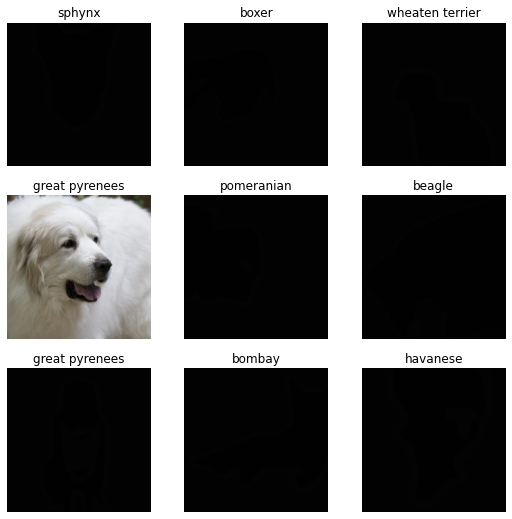

In [6]:
# View Data set (True == Cat, False == Dog)
dls.show_batch()

## **Generate Fast AI Model for identifying Cat/Dog Breeds**

In [14]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.647590,1.919090,0.532815,01:15


epoch,train_loss,valid_loss,error_rate,time
0,1.935343,1.715794,0.490189,01:22
1,1.787480,1.570474,0.464479,01:23
2,1.500141,1.385881,0.412382,01:22
3,1.267784,1.298503,0.389378,01:23
4,1.034224,1.295813,0.384303,01:23


In [13]:
learn101 = cnn_learner(dls, resnet101, metrics=error_rate)
learn101.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.357563,1.845194,0.496279,03:13


epoch,train_loss,valid_loss,error_rate,time
0,1.718771,1.381478,0.416779,04:13


## **Evaulate Model**

In [16]:
#Print top losses. 
interp = ClassificationInterpretation.from_learner(learn)

[1] /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_62.jpg
[2] /root/.fastai/data/oxford-iiit-pet/annotations/trimaps/havanese_82.png
[3] /root/.fastai/data/oxford-iiit-pet/annotations/trimaps/boxer_146.png
[4] /root/.fastai/data/oxford-iiit-pet/annotations/trimaps/Persian_128.png
[5] /root/.fastai/data/oxford-iiit-pet/images/chihuahua_85.jpg


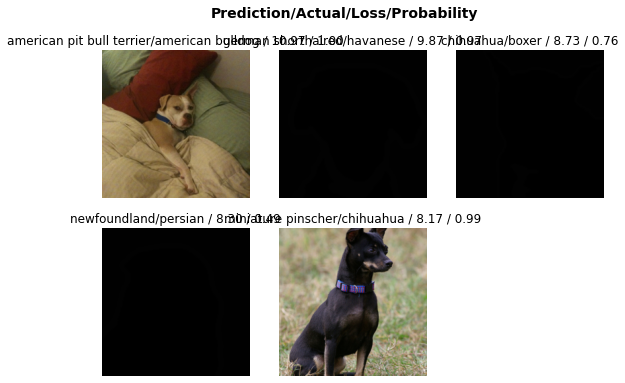

In [17]:
num_losses = 5
losses, indices = interp.top_losses(num_losses)
x = 1
for idx in indices:
    print(f"[{x}] {dls.valid_ds.items[idx]}")
    x += 1
interp.plot_top_losses(num_losses)

## **Upload Test Image**

In [10]:
'''
from google.colab import files
uploaded = files.upload()
'''

'\nfrom google.colab import files\nuploaded = files.upload()\n'

In [11]:
'''
import cv2
import numpy as np
from matplotlib import pyplot as plt

for fname in uploaded.keys():
  is_cat,_,probs = learn_species.predict(fname)

  # Show Image
  img = cv2.imread(fname)
  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_cvt)
  plt.show()

  print(f"Is %s a cat?: %s" % (fname, is_cat))
  print(f"Probability it's a cat: {probs[1].item():.6f}")
'''

'\nimport cv2\nimport numpy as np\nfrom matplotlib import pyplot as plt\n\nfor fname in uploaded.keys():\n  is_cat,_,probs = learn_species.predict(fname)\n\n  # Show Image\n  img = cv2.imread(fname)\n  img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n  plt.imshow(img_cvt)\n  plt.show()\n\n  print(f"Is %s a cat?: %s" % (fname, is_cat))\n  print(f"Probability it\'s a cat: {probs[1].item():.6f}")\n'

## **Save Model to Drive**

In [12]:
'''
from fastai.vision.all import *
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'deeplearn/'
dest=Path(base_dir + PROJECT_NAME)
try:
  dest.mkdir(parents=True, exist_ok=False)
except FileExistsError:
  print ('File Already Exists')
  
learn.export(dest/MODEL_NAME)
'''